In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('crime.csv')
df.head()

,month,Total_crimes,Serious,Huge_damage,Ecological,Terrorism,Extremism,Murder,Harm_to_health,Rape,Theft,Vehicle_theft,Fraud_scam,Hooligan,Drugs,Weapons
0,01.01.2003,214587.0,88203.0,20162.0,1216.0,630.0,13.0,2749.0,5559.0,574.0,81014.0,3549.0,7731.0,10560.0,16006.0,4661.0
1,01.02.2003,221928.0,88863.0,20889.0,1701.0,678.0,5.0,2444.0,4732.0,515.0,95970.0,3697.0,7607.0,10816.0,16839.0,5364.0
2,01.03.2003,248452.0,101349.0,24053.0,1817.0,809.0,10.0,2864.0,4851.0,560.0,79420.0,4327.0,9437.0,11813.0,20176.0,5938.0
3,01.04.2003,236299.0,91625.0,19754.0,2449.0,892.0,10.0,2919.0,4722.0,668.0,95215.0,5345.0,7824.0,12636.0,16614.0,5230.0
4,01.05.2003,230931.0,89615.0,17519.0,3530.0,796.0,20.0,2713.0,4895.0,688.0,94505.0,6374.0,7122.0,12234.0,14413.0,5112.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           205 non-null    object 
 1   Total_crimes    205 non-null    float64
 2   Serious         205 non-null    float64
 3   Huge_damage     205 non-null    float64
 4   Ecological      205 non-null    float64
 5   Terrorism       205 non-null    float64
 6   Extremism       205 non-null    float64
 7   Murder          205 non-null    float64
 8   Harm_to_health  205 non-null    float64
 9   Rape            205 non-null    float64
 10  Theft           205 non-null    float64
 11  Vehicle_theft   205 non-null    float64
 12  Fraud_scam      205 non-null    float64
 13  Hooligan        205 non-null    float64
 14  Drugs           205 non-null    float64
 15  Weapons         205 non-null    float64
dtypes: float64(15), object(1)
memory usage: 25.8+ KB


<Axes: >

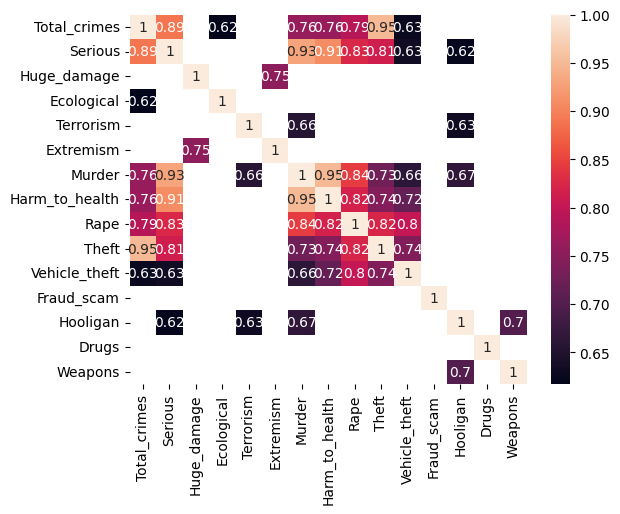

In [5]:
df_without_month = df.drop('month', axis =1)
corr = df_without_month.corr()
corr = corr[corr > 0.6]
sns.heatmap(data = corr, annot = True)

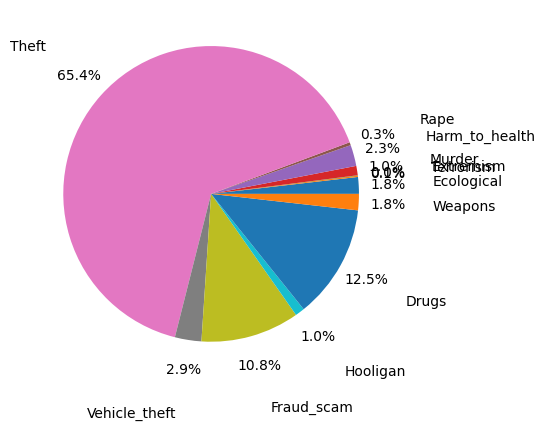

In [6]:
# Создадим временный датафрейм для того, чтобы посчитать долю каждого преступления в общем объёме преступлений
temp_frame =df.drop(['month', 'Serious', 'Huge_damage'],  axis =1)
stat = temp_frame.sum()
stat
perc = []
for i, val in enumerate(stat):
  percentage = stat[i] / stat[0]

  perc.append(percentage)

percentage_frame = pd.DataFrame()
percentage_frame['Number']=stat
percentage_frame['Percentage']=perc


percentage_new = percentage_frame.drop('Total_crimes', axis =0)

columns = []
for i, v in enumerate(percentage_new.T):
  columns.append(v)

plt.pie(percentage_new['Percentage'], labels = columns, autopct='%1.1f%%', pctdistance = 1.2, labeldistance = 1.5)
plt.show()

In [7]:
df.describe()

,Total_crimes,Serious,Huge_damage,Ecological,Terrorism,Extremism,Murder,Harm_to_health,Rape,Theft,Vehicle_theft,Fraud_scam,Hooligan,Drugs,Weapons
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,221279.019512,59068.487805,38402.039024,2592.463415,197.839024,59.473171,1451.400000,3276.024390,463.580488,92647.560976,4101.414634,15277.834146,1457.648780,17644.356098,2525.019512
std,51720.759692,20501.515982,20755.286960,1028.101551,245.462645,42.070500,687.713793,1013.861819,188.413369,25376.346430,1565.682727,4114.474680,2560.889194,3068.123707,733.169890
min,137657.000000,15755.000000,7424.000000,1216.000000,12.000000,2.000000,534.000000,1467.000000,134.000000,50155.000000,1092.000000,5687.000000,132.000000,7275.000000,1637.000000
25%,180711.000000,42135.000000,21813.000000,1888.000000,57.000000,26.000000,932.000000,2479.000000,322.000000,72533.000000,2928.000000,12481.000000,261.000000,16006.000000,2029.000000
50%,207550.000000,51426.000000,26357.000000,2322.000000,103.000000,52.000000,1200.000000,3256.000000,419.000000,88095.000000,3923.000000,15303.000000,486.000000,17924.000000,2351.000000
75%,254352.000000,78407.000000,59282.000000,3034.000000,184.000000,87.000000,1975.000000,4152.000000,574.000000,107555.000000,5125.000000,18005.000000,1785.000000,19686.000000,2868.000000
max,359098.000000,108299.000000,87941.000000,6822.000000,1198.000000,174.000000,3099.000000,5578.000000,1027.000000,153394.000000,8251.000000,27980.000000,12636.000000,25187.000000,5938.000000


In [8]:
X = df.drop(['Total_crimes', 'month'], axis = 1)
y = df.Total_crimes
X

,Serious,Huge_damage,Ecological,Terrorism,Extremism,Murder,Harm_to_health,Rape,Theft,Vehicle_theft,Fraud_scam,Hooligan,Drugs,Weapons
0,88203.0,20162.0,1216.0,630.0,13.0,2749.0,5559.0,574.0,81014.0,3549.0,7731.0,10560.0,16006.0,4661.0
1,88863.0,20889.0,1701.0,678.0,5.0,2444.0,4732.0,515.0,95970.0,3697.0,7607.0,10816.0,16839.0,5364.0
2,101349.0,24053.0,1817.0,809.0,10.0,2864.0,4851.0,560.0,79420.0,4327.0,9437.0,11813.0,20176.0,5938.0
3,91625.0,19754.0,2449.0,892.0,10.0,2919.0,4722.0,668.0,95215.0,5345.0,7824.0,12636.0,16614.0,5230.0
4,89615.0,17519.0,3530.0,796.0,20.0,2713.0,4895.0,688.0,94505.0,6374.0,7122.0,12234.0,14413.0,5112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,38967.0,64283.0,1858.0,122.0,48.0,555.0,1570.0,306.0,67006.0,1903.0,21557.0,155.0,15100.0,1945.0
201,53319.0,81775.0,2322.0,111.0,52.0,668.0,1846.0,223.0,81053.0,2197.0,27980.0,180.0,20510.0,1744.0
202,31652.0,49623.0,1581.0,149.0,27.0,622.0,1467.0,246.0,57434.0,1344.0,19794.0,132.0,11067.0,1742.0
203,38470.0,60742.0,1526.0,164.0,52.0,534.0,1644.0,134.0,63327.0,1374.0,22588.0,155.0,13451.0,1754.0


In [73]:
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, f1_score, mean_absolute_error, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

РЕГРЕССИЯ с помощью SVM

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

svm_regression = SVR(kernel = 'linear')

svm_regression.fit(X_train, y_train)

y_pred_svr = svm_regression.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred_svr)}, MSE: {mean_squared_error(y_test, y_pred_svr)}')

MAE: 3941.034593200966, MSE: 25350137.67487374


РЕГРЕССИЯ с помощью Linear Regression

In [11]:
linear_regr = LinearRegression()

linear_regr.fit(X_train, y_train)

y_pred_lr = linear_regr.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred_lr)}, MSE: {mean_squared_error(y_test, y_pred_lr)}')

MAE: 3573.0699089515406, MSE: 20677389.135471307


Как видно, линейная регрессия справилась лучше, MSE и MAE существенно меньше, а значит, модель точнее.

Для того, чтобы обучить модель бинарной регрессии определим два класса по параметру Serious. Всё, что левее медианы (оранжевая прямая) относим к 0 классу, остальное - к 1.

<ipython-input-13-516fd72e0d8f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Serious'], hist = False, kde = True,


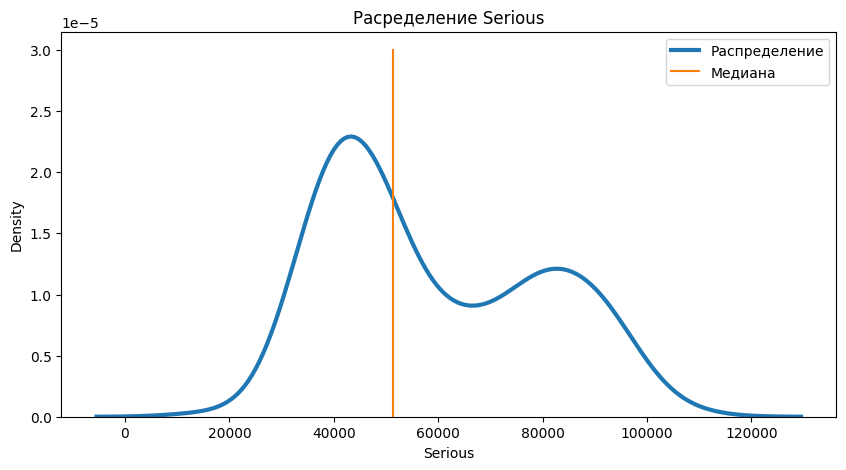

In [13]:
plt.figure(figsize=(10,5))

sns.distplot(df['Serious'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = 'Распределение')

median = [df['Serious'].median()]

x = median * 2
y = [0,0.00003]

plt.plot(x, y, label = 'Медиана')
plt.legend()
plt.title('Расределение Serious')

plt.show()

In [49]:
serious_category = []

for i, row in df.iterrows():
  if row[2] < median[0]:
    serious_category.append(0)
  elif row[2] >= median[0]:
    serious_category.append(1)

df['Serious_category'] = serious_category

In [67]:
# Отбросим ненужные стобцы
y = df['Serious_category']
X = df.drop(['month', 'Serious', 'Serious_category'], axis = 1)

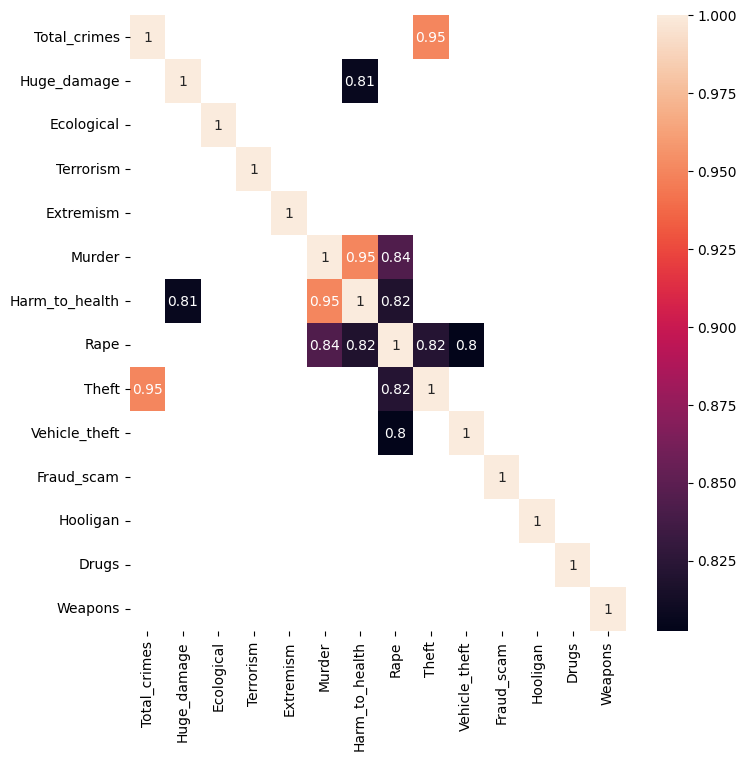

In [68]:
# Построим матрицу корреляции, чтобы отбросить колонки с большим влиянием друг на друга
data = X.corr().abs()

plt.figure(figsize= (8,8))

sns.heatmap(data[data>0.8], annot = True)

plt.show()

Думаю стоит выкинуть колонку Rape, поскольку есть очень сильная зависимость с Murder и Harm_to_Health

In [70]:
X = X.drop('Rape', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

КЛАССИФИКАЦИЯ с помощью SVM

In [71]:
svm_classificator = SVC(kernel = 'linear')

svm_classificator.fit(X_train, y_train)

y_pred_svc = svm_classificator.predict(X_test)

In [77]:
conf_matrix = confusion_matrix(y_test, y_pred_svc)
f_1 = f1_score(y_test, y_pred_svc)

print(f'Confussion Matrix:\n{conf_matrix}')
print(f'F1-score: {f_1}')

Confussion Matrix:
[[18  0]
 [ 1 22]]
F1-score: 0.9777777777777777


КЛАССИФИКАЦИЯ с помощью логистической регрессии

In [84]:
log_regr = LogisticRegression(solver = 'liblinear')

log_regr.fit(X_train, y_train)

y_pred_logr = log_regr.predict(X_test)

In [85]:
conf_matrix = confusion_matrix(y_test, y_pred_logr)
f_1 = f1_score(y_test, y_pred_logr)

print(f'Confussion Matrix:\n{conf_matrix}')
print(f'F1-score: {f_1}')

Confussion Matrix:
[[17  1]
 [ 3 20]]
F1-score: 0.909090909090909


Как видно, SVM-классификатор справился з бинароной классификаций сущесвтенно лучше, чем Логистическая регрессия.

Теперь попробуем провести кросс-валидацию с Логистической регрессией для того, чтобы попытаться увеличить её точность. Разделим X на три выборки (0-69, 69-137, 137-205). Проверять точность будем на том же y_test.

In [89]:
from sklearn.utils import shuffle

X = df.drop(['month', 'Serious', 'Rape'], axis = 1)
X_shuffled = shuffle(X)

In [90]:
y = X_shuffled['Serious_category']

In [93]:
X_shuffled = X_shuffled.drop('Serious_category', axis=1)

In [94]:
X1_train = X_shuffled[:69]
X2_train = X_shuffled[69:137]
X3_train = X_shuffled[137:]

y1_train = y[:69]
y2_train = y[69:137]
y3_train = y[137:]

Обучим эти три модели

In [95]:
# Первая выборка
log_regr1 = LogisticRegression(solver = 'liblinear')

log_regr1.fit(X1_train, y1_train)

y_pred_logr1 = log_regr1.predict(X_test)

In [96]:
# Вторая выборка
log_regr2 = LogisticRegression(solver = 'liblinear')

log_regr2.fit(X2_train, y2_train)

y_pred_logr2 = log_regr2.predict(X_test)

In [97]:
# Третья выборка
log_regr3 = LogisticRegression(solver = 'liblinear')

log_regr3.fit(X3_train, y3_train)

y_pred_logr3 = log_regr3.predict(X_test)

Теперь проверим их точность

In [98]:
conf_matrix1 = confusion_matrix(y_test, y_pred_logr1)
f_1_1 = f1_score(y_test, y_pred_logr1)
conf_matrix2 = confusion_matrix(y_test, y_pred_logr2)
f_1_2 = f1_score(y_test, y_pred_logr2)
conf_matrix3 = confusion_matrix(y_test, y_pred_logr3)
f_1_3 = f1_score(y_test, y_pred_logr3)

print(f'Confussion Matrix Original:\n{conf_matrix}')
print(f'F1-score Original: {f_1}')
print(f'Confussion Matrix 1:\n{conf_matrix1}')
print(f'F1-score 1: {f_1_1}')
print(f'Confussion Matrix 2:\n{conf_matrix2}')
print(f'F1-score 2: {f_1_2}')
print(f'Confussion Matrix 3:\n{conf_matrix3}')
print(f'F1-score 3: {f_1_3}')

Confussion Matrix Original:
[[17  1]
 [ 3 20]]
F1-score Original: 0.909090909090909
Confussion Matrix 1:
[[17  1]
 [ 1 22]]
F1-score 1: 0.9565217391304348
Confussion Matrix 2:
[[17  1]
 [ 2 21]]
F1-score 2: 0.9333333333333332
Confussion Matrix 3:
[[15  3]
 [ 1 22]]
F1-score 3: 0.9166666666666666


Видно, что каждая из обученных моделей точнее, чем оригинальная. Самой точной стала модель, обученная с 1-69 элемент X.